# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Datasets

In [3]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
# Basic Information & Overview
print("Shape of the dataset:", df.shape)
print("\n Data Info: \n")
df.info()

# Summary statistics
df.describe(include = 'all')

Shape of the dataset: (398, 9)

 Data Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,usa,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249,6
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,NaN,NaN
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,NaN,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,NaN,NaN
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,NaN,NaN


# Data Cleaning

In [5]:
missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': (df.isnull().sum()/len(df)) * 100
})

missing.sort_values(by='missing_percent', ascending=False)

,missing_count,missing_percent
horsepower,6,1.507538
mpg,0,0.000000
cylinders,0,0.000000
displacement,0,0.000000
weight,0,0.000000
acceleration,0,0.000000
model_year,0,0.000000
origin,0,0.000000
name,0,0.000000


In [6]:
# Handle missing values
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
df['weight'] = df['weight'].fillna(df['weight'].mean())
df['acceleration'] = df['acceleration'].fillna(df['acceleration'].mean())

# Fill categorical columns
df['origin'] = df['origin'].fillna(df['origin'].mode()[0])
df['name'] = df['name'].fillna(df['name'].mode()[0])

# Drop 'model_year' if needed (no missing but for example)
# df.drop(columns=['model_year'], inplace=True)

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
## Convert some columns to category type
df['origin'] = df['origin'].astype('category')
df['model_year'] = df['model_year'].astype('category')
df['name'] = df['name'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    398 non-null    float64 
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model_year    398 non-null    category
 7   origin        398 non-null    category
 8   name          398 non-null    category
dtypes: category(3), float64(4), int64(2)
memory usage: 31.6 KB


# Analysis with their Insights

--- Statistical Summary ---
              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  398.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.199187   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   76.000000  2223.750000   
50%     23.000000    4.000000    148.500000   95.000000  2803.500000   
75%     29.000000    8.000000    262.000000  125.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  
count    398.000000  
mean      15.568090  
std        2.757689  
min        8.000000  
25%       13.825000  
50%       15.500000  
75%       17.175000  
max       24.800000  
------------------------------


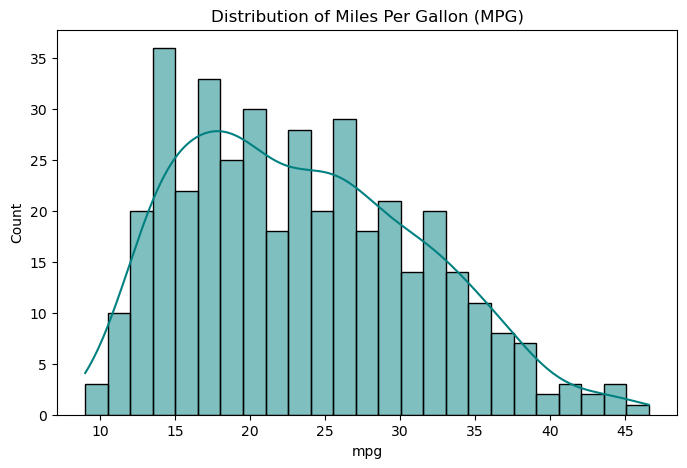

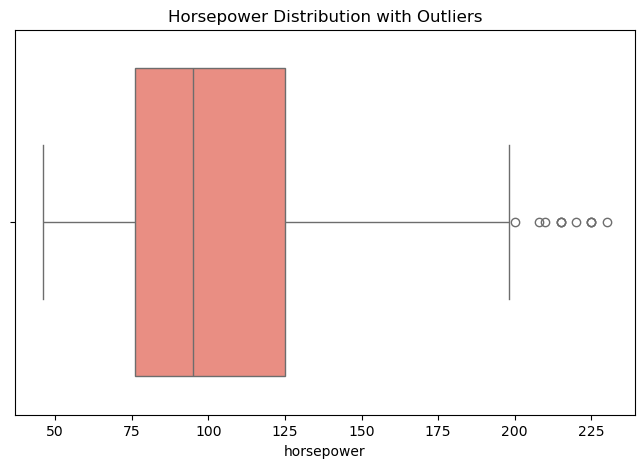

In [8]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("--- Statistical Summary ---")
print(df[num_cols].describe())
print("-" * 30)

# 2. Histogram : MPG (Target Variable)
plt.figure(figsize=(8, 5))
sns.histplot(df['mpg'], bins=25, kde=True, color='teal')
plt.title("Distribution of Miles Per Gallon (MPG)")
plt.show()

# 3. Boxplot : Horsepower
plt.figure(figsize=(8, 5))
# Note: 'horsepower' has missing values (NaN) which are handled automatically by Seaborn/Pandas,
# but it's best practice to impute/drop them before modeling.
sns.boxplot(x=df['horsepower'], color='salmon')
plt.title("Horsepower Distribution with Outliers")
plt.show()

<Figure size 600x400 with 0 Axes>

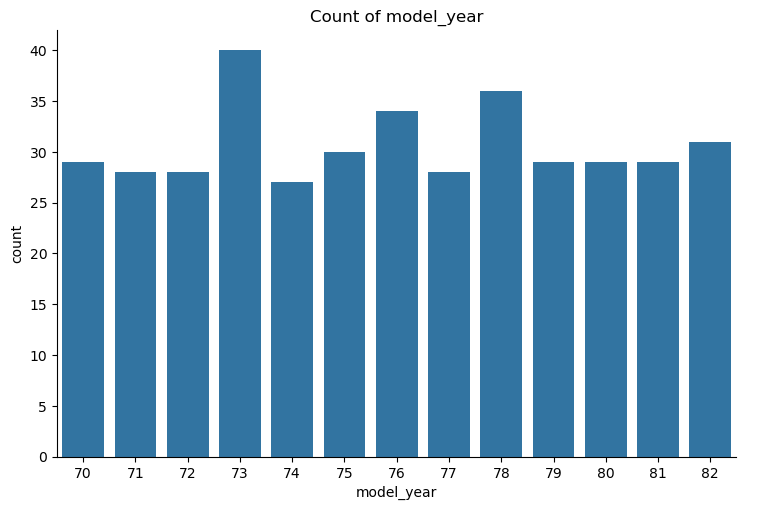

<Figure size 600x400 with 0 Axes>

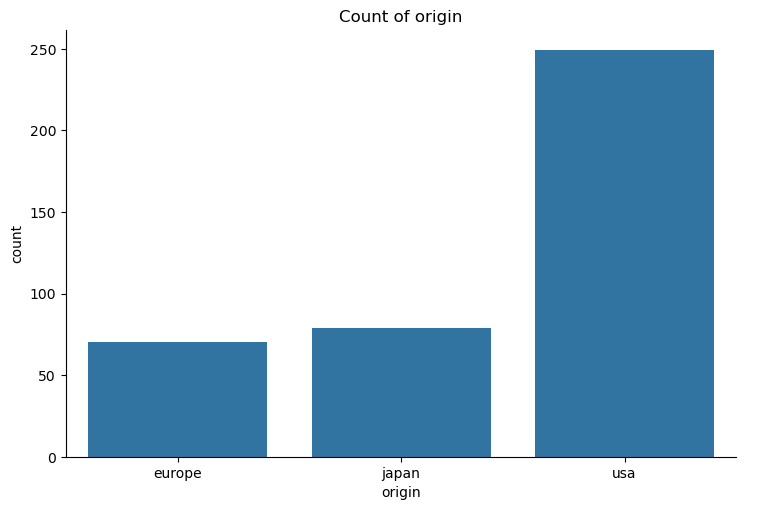

<Figure size 600x400 with 0 Axes>

In [ ]:
# Univariate Analysis - Categorical Features

df['origin'] = df['origin'].astype('category')
df['model_year'] = df['model_year'].astype('category')
df['name'] = df['name'].astype('category') # High cardinality, but included for category count

cat_cols = df.select_dtypes('category').columns

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    # 'name' has too many unique values for a useful count plot, so we'll skip it for visualization
    if col != 'name':
        sns.catplot(x=col, data=df, kind='count', aspect=1.5)
        plt.title(f"Count of {col}")
        plt.show()

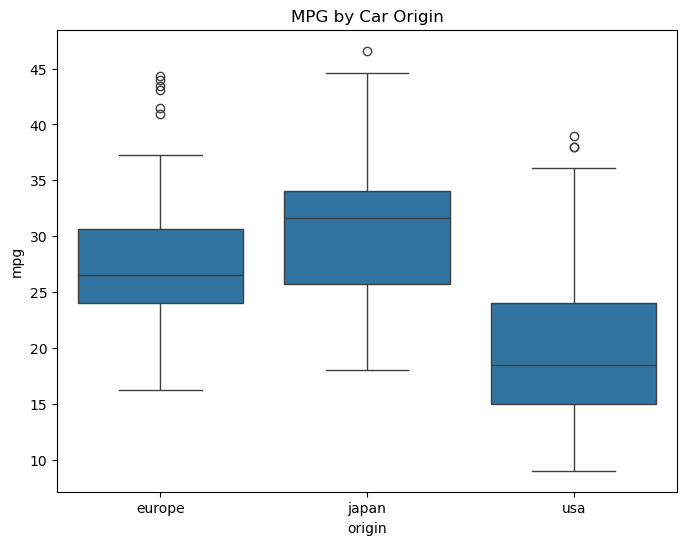

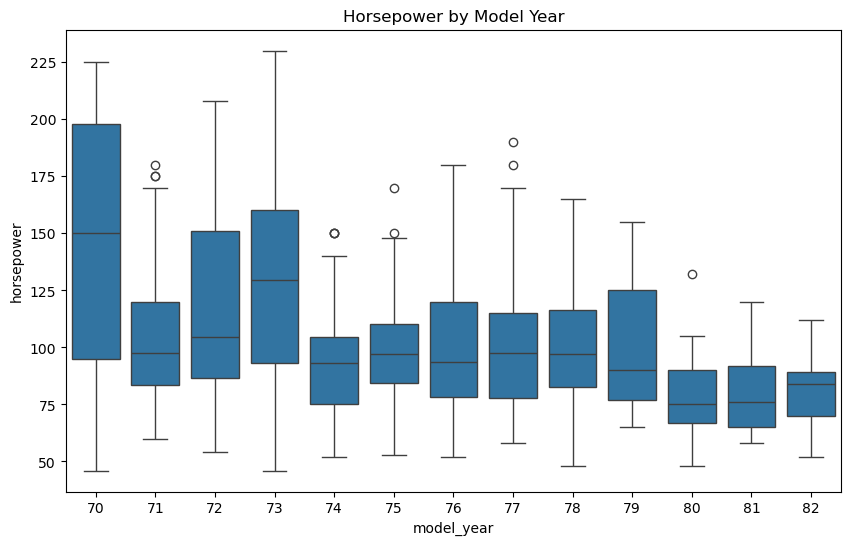

In [10]:
# Boxplot: MPG by Origin
plt.figure(figsize=(8, 6))
sns.boxplot(x='origin', y='mpg', data=df)
plt.title("MPG by Car Origin")
plt.show()

# Boxplot: Horsepower by Model Year
plt.figure(figsize=(10, 6))
sns.boxplot(x='model_year', y='horsepower', data=df)
plt.title("Horsepower by Model Year")
plt.show()

<Figure size 1000x600 with 0 Axes>

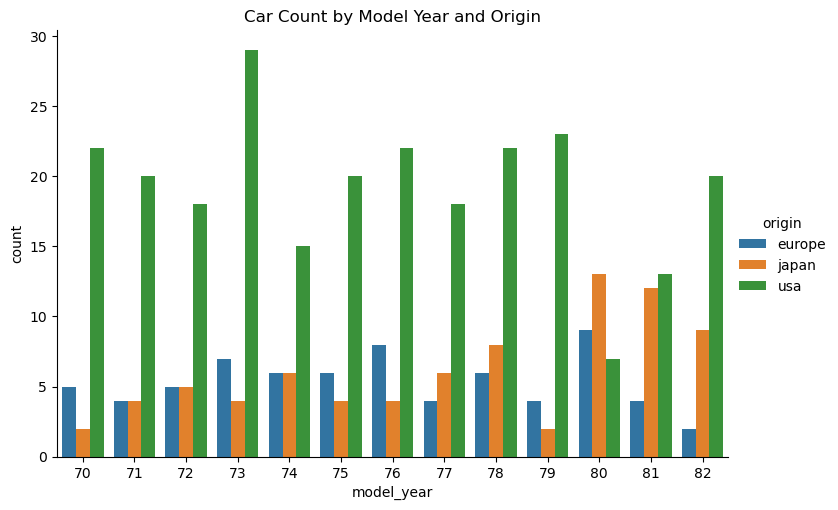

<Figure size 1000x600 with 0 Axes>

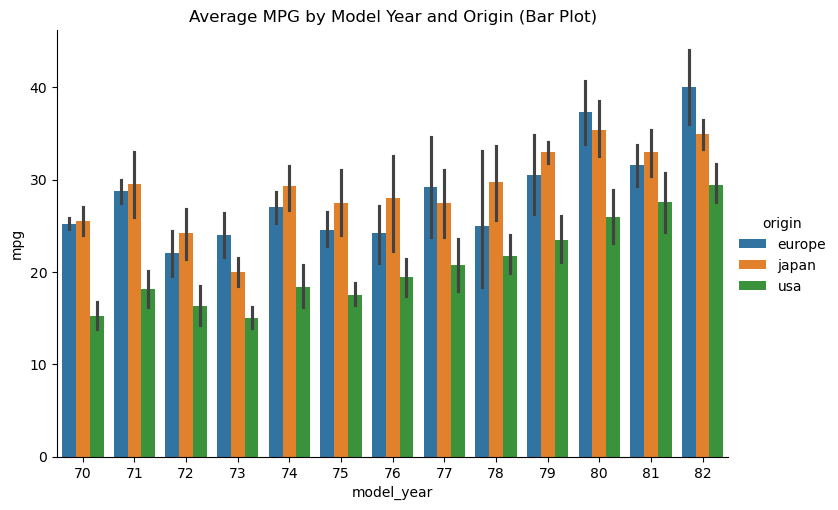

In [11]:
# Catplot: Count of Cars by Model Year, Grouped by Origin
plt.figure(figsize=(10, 6))
sns.catplot(x='model_year', hue='origin', kind='count', data=df, aspect=1.5)
plt.title("Car Count by Model Year and Origin")
plt.show()

# Catplot: Average MPG by Model Year, Grouped by Origin
plt.figure(figsize=(10, 6))
sns.catplot(x='model_year', y='mpg', hue='origin', kind='bar', data=df, aspect=1.5)
plt.title("Average MPG by Model Year and Origin (Bar Plot)")
plt.show()

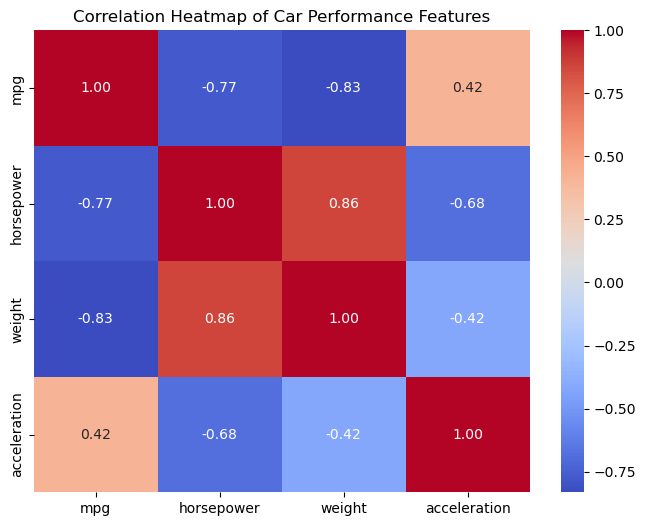

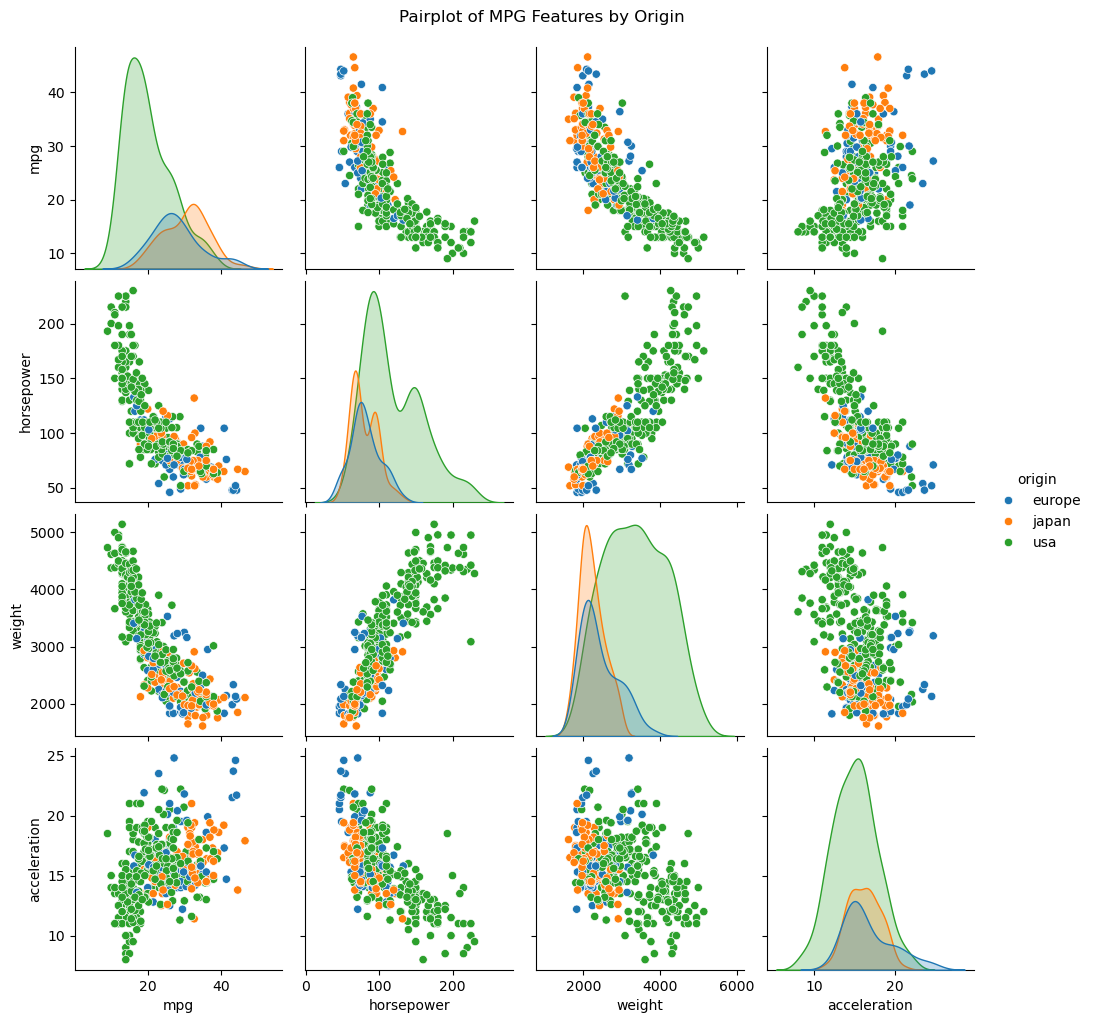

In [12]:
# Numerical columns for correlation
num_cols = ['mpg', 'horsepower', 'weight', 'acceleration']

# 1. Correlation Heatmap
corr = df[num_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Car Performance Features")
plt.show()

# 2. Pairplot
# Use 'origin' as the hue for multivariate visualization
sns.pairplot(df, vars=num_cols, hue='origin')
plt.suptitle("Pairplot of MPG Features by Origin", y=1.02)
plt.show()

### Insights:
1. Weight vs. MPG: There is a very strong negative correlation (-0.87) between weight and mpg, meaning heavier cars are significantly less fuel-efficient.

2. Horsepower vs. MPG: horsepower also shows a strong negative correlation (-0.84) with mpg.

Number of outliers in horsepower:  11
----------------------------------------


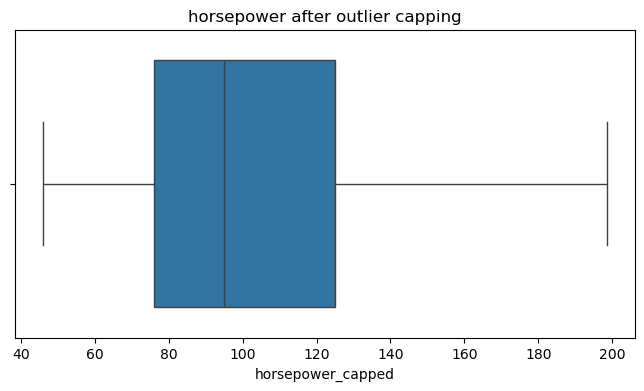

In [13]:
column = 'horsepower'

# Outlier Detection using IQR
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df[column] < lower) | (df[column] > upper)]

print("Number of outliers in horsepower: ", len(outliers))
print("-" * 40)

# Outlier Capping and Visualization
df[f'{column}_capped'] = df[column].clip(lower, upper)
plt.figure(figsize=(8, 4))
sns.boxplot(x=df[f'{column}_capped'])
plt.title(f"{column} after outlier capping")
plt.show()

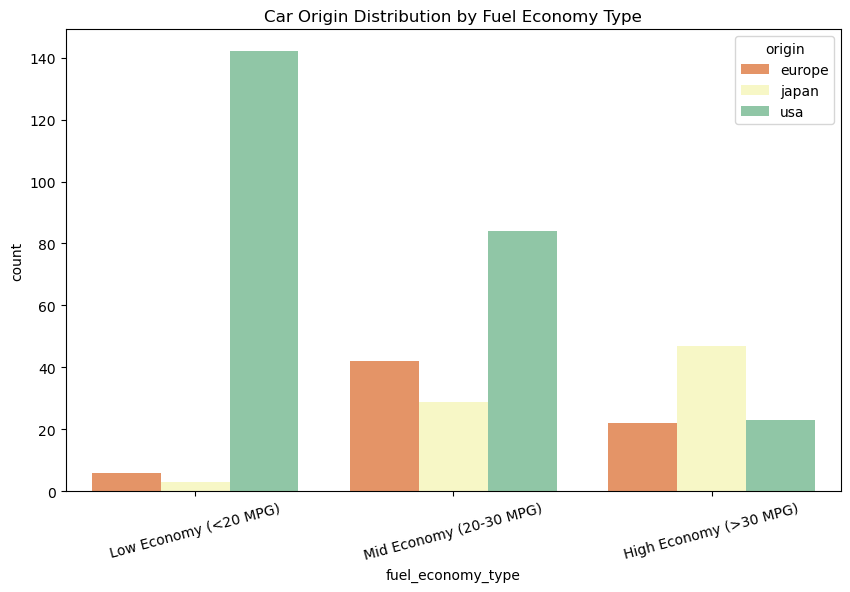

In [14]:
# --- Feature Engineering ---
# Define fuel economy bins
bins = [0, 20, 30, 100]
labels = ['Low Economy (<20 MPG)', 'Mid Economy (20-30 MPG)', 'High Economy (>30 MPG)']
df['fuel_economy_type'] = pd.cut(df['mpg'], bins=bins, labels=labels, right=False).astype('category')

# --- Visualization ---
# Visualize the count of fuel economy types, broken down by car origin
plt.figure(figsize=(10, 6))
sns.countplot(x='fuel_economy_type', hue='origin', data=df, palette='Spectral')
plt.title("Car Origin Distribution by Fuel Economy Type")
plt.xticks(rotation=15)
plt.show()

In [15]:
df.to_csv("MPG_cleaned_fe.csv", index=False)
print("\nCleaned MPG data saved as MPG_cleaned_fe.csv")


Cleaned MPG data saved as MPG_cleaned_fe.csv
